In [5]:
from Manager import *
from VisionUtils import *
tf.enable_eager_execution()
from imgaug import augmenters as iaa
import imgaug as ia
import matplotlib.pyplot as plt
import numpy as np

In [6]:
IMG_RT_PATH = 'data/images/'
FEATURE_RT_PATH = "data/processed/motion_blur_features/"
FEATURE_AUG_RT_PATH = "data/image_aug_features/"
IMG_AUG_RT_PATH = 'data/images_aug/'

#img_list = pd.read_csv(IMG_RT_PATH + "test_list.TXT")
feature_extractor = load_model("Models\FaceNet/Facenet_keras.h5")
face_detector = MTCNN()

W0929 16:50:24.830398  1324 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [8]:
import os 
img_path_list = []
folder_list = os.listdir(IMG_RT_PATH)
for FOLDER in folder_list:
    if '.' in FOLDER:
        continue
    image_list_names = os.listdir(IMG_RT_PATH + FOLDER)
    for NAME in image_list_names:
        img_path_list.append(FOLDER+'/'+NAME)

In [9]:
img_list = pd.DataFrame({"path": img_path_list})

In [10]:
iman = ImageManager(img_list, feature_extractor = feature_extractor,
                    face_detector = face_detector,
                    IMG_RTPATH= IMG_RT_PATH)

In [11]:
iman.split(train_size = 0.75)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
img_path_list[0]

'n000002/0001_01.jpg'

In [13]:
input_shape = feature_extractor.input_shape[1:]

In [14]:
def extract_feature( feature_extractor, img, bb):
    """
    Extract features given img, bounding box and feature extractor
    """
    insz = feature_extractor.input_shape
    img = crop_face(img, bb)
    img = cv2.resize(img, (160,160), interpolation = cv2.INTER_AREA)
    img = normalize(img).reshape((1, insz[1],insz[2], insz[3]))
    image_feature = feature_extractor.predict(img)
    return image_feature

In [15]:
img_path_list[0].split('/')[0]

'n000002'

In [16]:
import tqdm
img_path_list[0][:-4]

'n000002/0001_01'

In [34]:
seq = iaa.Sequential([iaa.MotionBlur(k = 15)])

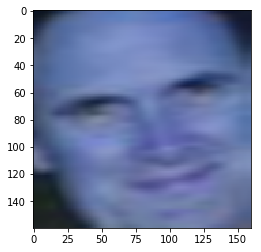

In [37]:
img = cv2.imread(IMG_RT_PATH + img_path_list[345])
plt.imshow(seq.augment_images([img]))

plt.show()

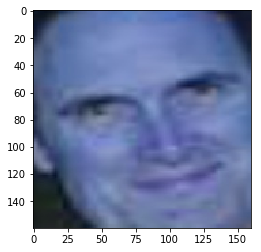

In [38]:
plt.imshow(img)

In [40]:
for IMG_PATH in tqdm.tqdm(img_path_list):
    if (os.path.isfile(IMG_RT_PATH + IMG_PATH)):
        if '._' in IMG_PATH:
            continue
        img = cv2.imread(IMG_RT_PATH + IMG_PATH)
    else: 
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bb = detect_faces(img, face_detector)
    if(len(bb) != 1):
        continue
    img = seq.augment_images([img])
    feature = extract_feature(feature_extractor, img[0], bb[0])
    if(os.path.isdir(FEATURE_RT_PATH + IMG_PATH.split('/')[0])):
        np.save( FEATURE_RT_PATH + IMG_PATH[:-4]+ ".npy", feature)
    else:
        os.mkdir(FEATURE_RT_PATH + IMG_PATH.split('/')[0])
        np.save( FEATURE_RT_PATH + IMG_PATH[:-4] + ".npy", feature)
    
        
        

100%|███████████████████████████████████████████████████████████████████████| 397913/397913 [13:33:44<00:00,  8.64it/s]


In [79]:
img = cv2.imread(IMG_RT_PATH + IMG_PATH)

In [82]:
IMG_RT_PATH 

'data/whole_images/'